# Data Science Project Final Report

Importing the required libraries

In [2]:
library(tidymodels)
library(tidyverse)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::

In [3]:
data <- read.csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz") |>
    select(experience, age, played_hours) |>
    mutate(experience = as.factor(experience)) |>
    filter(played_hours > 0.5, age <70, played_hours < 100)
data

experience,age,played_hours
<fct>,<int>,<dbl>
Pro,9,30.3
Veteran,17,3.8
Amateur,21,0.7
Veteran,23,1.6
Beginner,25,1.5
Amateur,17,48.4
Regular,19,0.6
Beginner,17,1.0
Amateur,21,0.7


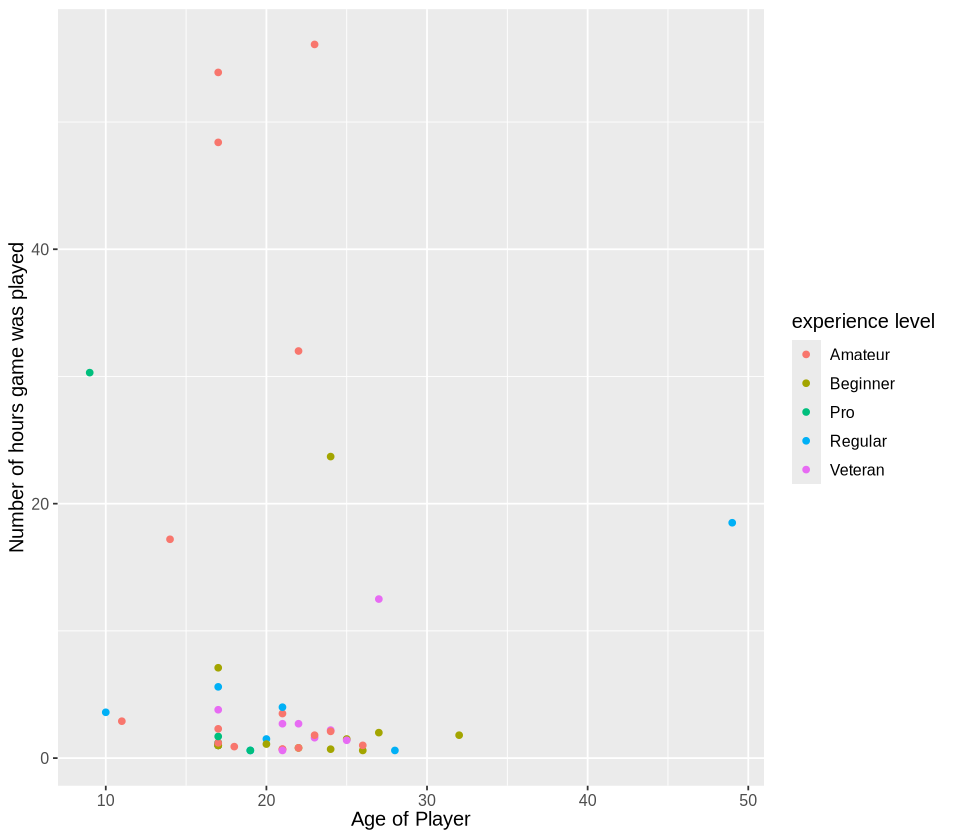

In [4]:
options(repr.plot.height = 7, repr.plot.width = 8)
data_plot <- data |>
    ggplot(aes(x = age, y = played_hours, color = experience)) + 
    geom_point() + 
    labs(color = "experience level", x = "Age of Player", y = "Number of hours game was played") + 
    theme(text = element_text(size = 12))
data_plot

In [105]:
set.seed(5)
data_split <- initial_split(data, prop = 0.7, strata = experience)
train_data <- training(data_split)
test_data <- testing(data_split)
train_data
test_data

experience,age,played_hours
<fct>,<int>,<dbl>
Amateur,17,48.4
Amateur,21,0.7
Amateur,18,0.9
Amateur,14,17.2
Amateur,17,53.9
Amateur,21,3.5
Amateur,17,1.2
Amateur,26,1.0
Amateur,24,2.1


experience,age,played_hours
<fct>,<int>,<dbl>
Veteran,17,3.8
Amateur,21,0.7
Beginner,17,1.0
Amateur,23,1.8
Amateur,11,2.9
Regular,10,3.6
Regular,20,1.5
Veteran,17,1.0
Regular,21,4.0


In [106]:
glimpse(train_data)

Rows: 32
Columns: 3
$ experience   <fct> Amateur, Amateur, Amateur, Amateur, Amateur, Amateur, Ama…
$ age          <int> 17, 21, 18, 14, 17, 21, 17, 26, 24, 22, 22, 25, 26, 22, 2…
$ played_hours <dbl> 48.4, 0.7, 0.9, 17.2, 53.9, 3.5, 1.2, 1.0, 2.1, 0.8, 32.0…


In [107]:
glimpse(test_data)

Rows: 17
Columns: 3
$ experience   <fct> Veteran, Amateur, Beginner, Amateur, Amateur, Regular, Re…
$ age          <int> 17, 21, 17, 23, 11, 10, 20, 17, 21, 17, 23, 20, 19, 32, 2…
$ played_hours <dbl> 3.8, 0.7, 1.0, 1.8, 2.9, 3.6, 1.5, 1.0, 4.0, 7.1, 56.1, 1…


In [108]:
player_proportion <- train_data |>
    group_by(experience) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(train_data))
player_proportion

experience,n,percent
<fct>,<int>,<dbl>
Amateur,11,34.375
Beginner,8,25.000
Pro,3,9.375
Regular,4,12.500
Veteran,6,18.750


In [118]:
set.seed(5)
knn_recipe <- recipe(experience ~ age + played_hours, data = train_data) |>
    step_scale(all_predictors()) |>
   step_center(all_predictors())
knn_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [119]:
set.seed(5)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


In [120]:
set.seed(5)
knn_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    fit(data = train_data)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.78125
Best kernel: rectangular
Best k: 3

In [121]:
set.seed(5)
knn_test_predictions <- predict(knn_fit , test_data) |>
      bind_cols(test_data)
knn_test_predictions

.pred_class,experience,age,played_hours
<fct>,<fct>,<int>,<dbl>
Regular,Veteran,17,3.8
Amateur,Amateur,21,0.7
Beginner,Beginner,17,1.0
Veteran,Amateur,23,1.8
Amateur,Amateur,11,2.9
Regular,Regular,10,3.6
Amateur,Regular,20,1.5
Beginner,Veteran,17,1.0
Amateur,Regular,21,4.0


In [122]:
set.seed(5)
knn_prediction_accuracy <- knn_test_predictions |>
        metrics(truth = experience, estimate = .pred_class) |>
        filter(.metric == "accuracy")
knn_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.3529412


In [123]:
set.seed(5)
knn_vfold <- vfold_cv(train_data, v = 5, strata = experience)

In [124]:
set.seed(5)
knn_resample_fit <- workflow() |>
      add_recipe(knn_recipe) |>
      add_model(knn_spec) |>
      fit_resamples(resamples = knn_vfold)

→ A | warning: ✖ No observations were detected in `truth` for level: Pro.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

→ B | warning: ✖ No observations were detected in `truth` for level: Regular.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1
There were issues with some computations   A: x2   B: x1





In [125]:
set.seed(5)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [126]:
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |>
      add_recipe(knn_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = knn_vfold, grid = k_vals) |>
      collect_metrics()

knn_results

→ A | warning: ✖ No observations were detected in `truth` for level: Pro.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

→ B | warning: ✖ No observations were detected in `truth` for level: Regular.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

There were issues with some computations   A: x2   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.1154762,5,0.05401929,Preprocessor1_Model01
1,roc_auc,hand_till,0.4319444,5,0.02849762,Preprocessor1_Model01
2,accuracy,multiclass,0.1154762,5,0.05401929,Preprocessor1_Model02
2,roc_auc,hand_till,0.5122222,5,0.06580666,Preprocessor1_Model02
3,accuracy,multiclass,0.1488095,5,0.04587583,Preprocessor1_Model03
3,roc_auc,hand_till,0.5019444,5,0.05438143,Preprocessor1_Model03
4,accuracy,multiclass,0.1738095,5,0.04931504,Preprocessor1_Model04
4,roc_auc,hand_till,0.4898611,5,0.04703373,Preprocessor1_Model04
5,accuracy,multiclass,0.1119048,5,0.04902681,Preprocessor1_Model05


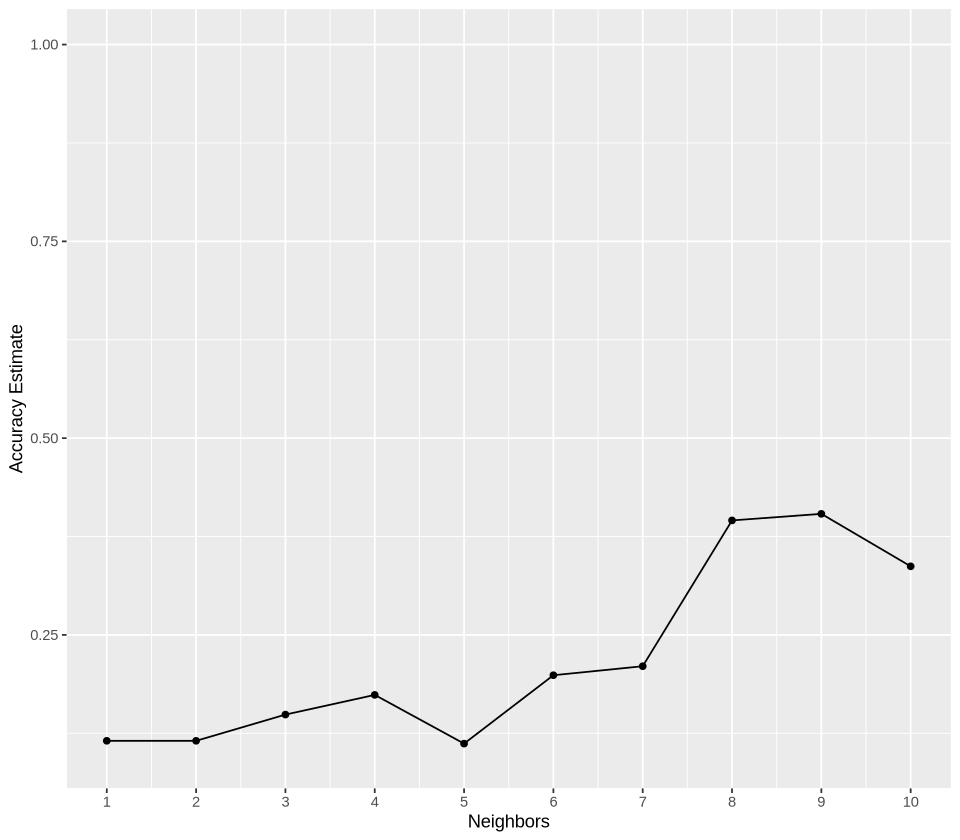

In [128]:
accuracies <- knn_results |> 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.1, 1.0)) # adjusting the y-axis

accuracy_versus_k

In [129]:
knn_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
      set_engine("kknn") |>
      set_mode("classification")
knn_final_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 9
  weight_func = rectangular

Computational engine: kknn 


In [130]:
knn_final_recipe <- recipe(experience ~ age + played_hours, data = train_data)
knn_final_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



In [131]:
knn_final_fit <- workflow() |>
    add_recipe(knn_final_recipe) |>
    add_model(knn_final_spec) |>
    fit(data = train_data)
knn_final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.71875
Best kernel: rectangular
Best k: 9

In [134]:
knn_final_predictions <- predict(knn_final_fit , test_data) |>
      bind_cols(test_data)
knn_final_predictions

.pred_class,experience,age,played_hours
<fct>,<fct>,<int>,<dbl>
Amateur,Veteran,17,3.8
Amateur,Amateur,21,0.7
Amateur,Beginner,17,1.0
Veteran,Amateur,23,1.8
Amateur,Amateur,11,2.9
Amateur,Regular,10,3.6
Amateur,Regular,20,1.5
Amateur,Veteran,17,1.0
Veteran,Regular,21,4.0


In [135]:
knn_prediction_accuracy <- knn_final_predictions |>
        metrics(truth = experience, estimate = .pred_class) |>
        filter(.metric == "accuracy")
knn_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.3529412


In [137]:
player_summary <- knn_final_predictions |>
  group_by(.pred_class) |>
  summarize(
    avg_age = mean(age),
    avg_played_hours = mean(played_hours),
    count = n()
  ) |>
  arrange(desc(count))
player_summary

.pred_class,avg_age,avg_played_hours,count
<fct>,<dbl>,<dbl>,<int>
Amateur,17.38462,6.415385,13
Veteran,21.66667,2.833333,3
Beginner,32.00000,1.800000,1


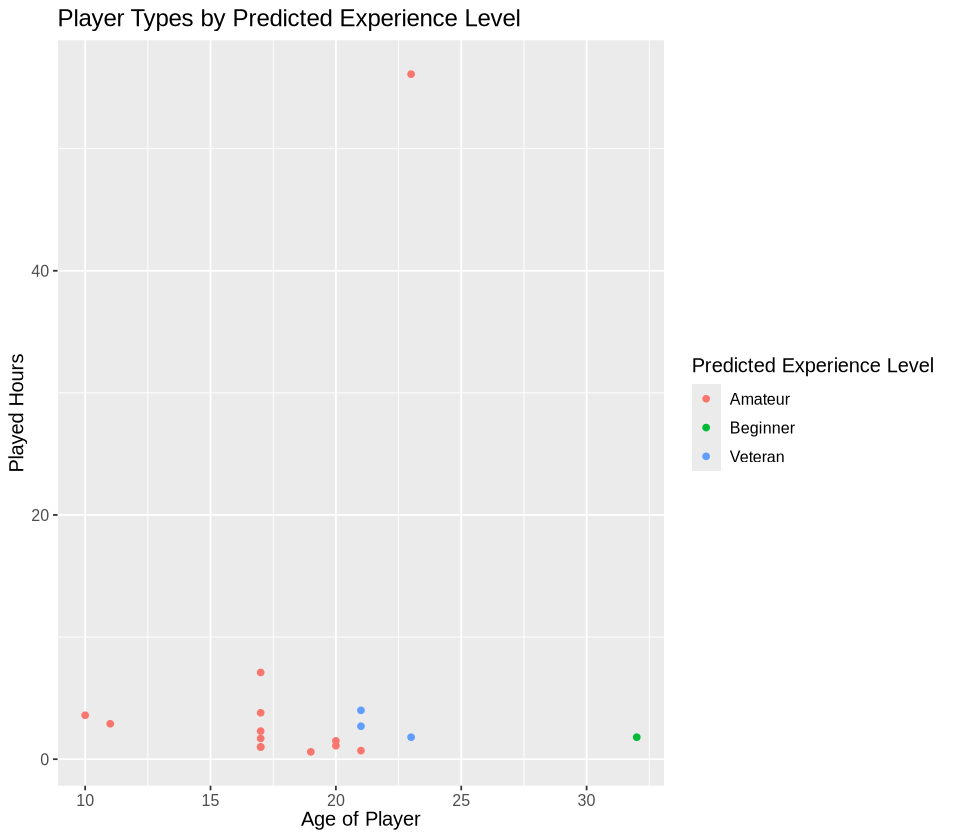

In [138]:
plot_kinds <- ggplot(knn_final_predictions, aes(x = age, y = played_hours, color = .pred_class)) +
  geom_point() +
  labs(title = "Player Types by Predicted Experience Level",
       x = "Age of Player",
       y = "Played Hours",
       color = "Predicted Experience Level") +
  theme(text = element_text(size = 12))
plot_kinds

The "kinds" of players who are most likely to contribute a large amount of data are players with an Amateur level of gaming experience in Minecraft and are aged 17-20 years.